In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = {
    'Model': [
        'IndoBERT',
        'RoBERTa',
        'mBERT',
        'DistilBERT'
    ],
    'Time (hours)': [1.2808, 1.2514, 2.0037, 1.0037]
}

df_time = pd.DataFrame(data)

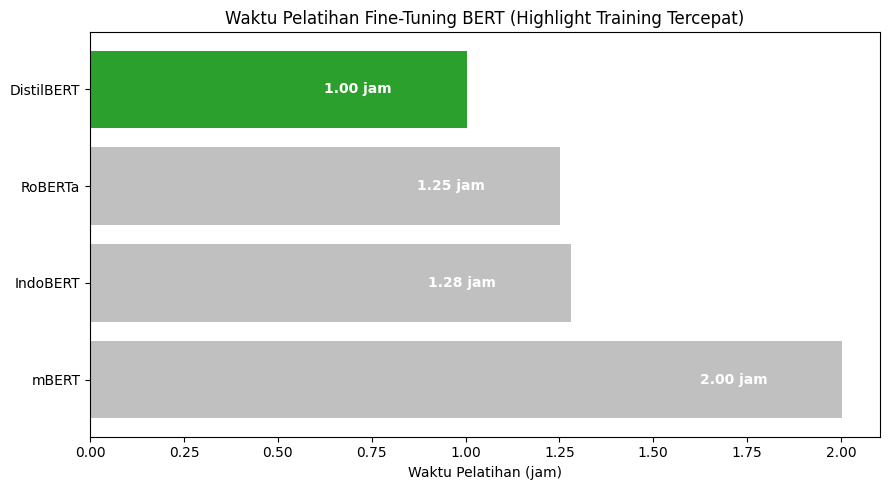

In [14]:
df_time = df_time.sort_values(by='Time (hours)', ascending=False).reset_index(drop=True)

# Temukan waktu pelatihan tercepat (minimum)
min_time = df_time['Time (hours)'].min()

# Warna default dan warna highlight
default_color = '#C0C0C0'  # abu-abu
highlight_color = '#2CA02C'  # hijau (training tercepat)

bar_colors = [
    highlight_color if t == min_time else default_color 
    for t in df_time['Time (hours)']
]

plt.figure(figsize=(9,5))
bars = plt.barh(df_time['Model'], df_time['Time (hours)'], color=bar_colors)

max_time = df_time['Time (hours)'].max()

for bar in bars:
    width = bar.get_width()

    # Posisi teks aman dan tidak melewati border
    text_x = width - (max_time * 0.1)
    plt.text(text_x,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f} jam",
             va='center', ha='right',
             fontsize=10, fontweight='bold', color='white')

plt.xlabel("Waktu Pelatihan (jam)")
plt.title("Waktu Pelatihan Fine-Tuning BERT (Highlight Training Tercepat)")
plt.tight_layout()
plt.show()

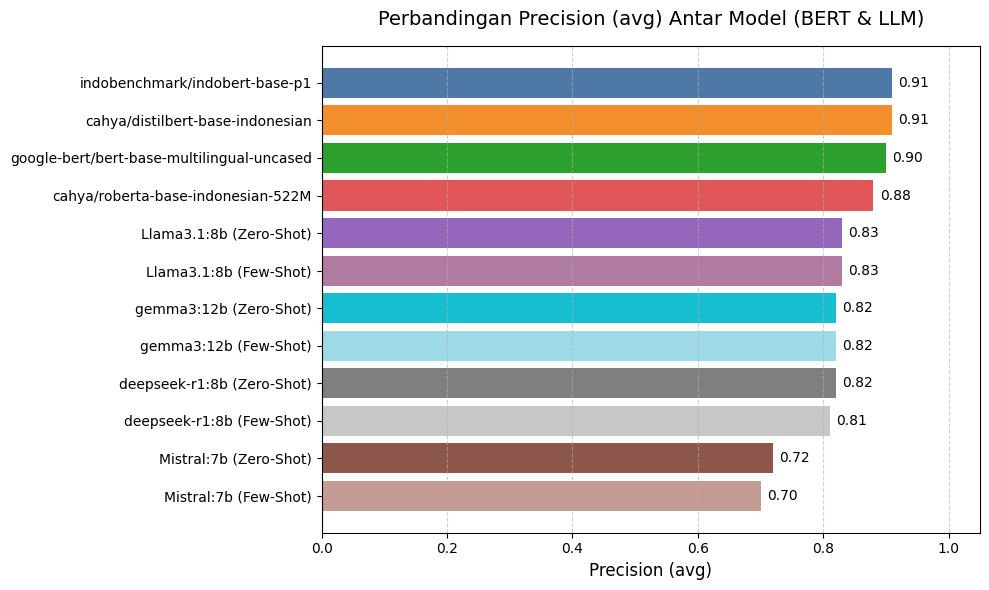

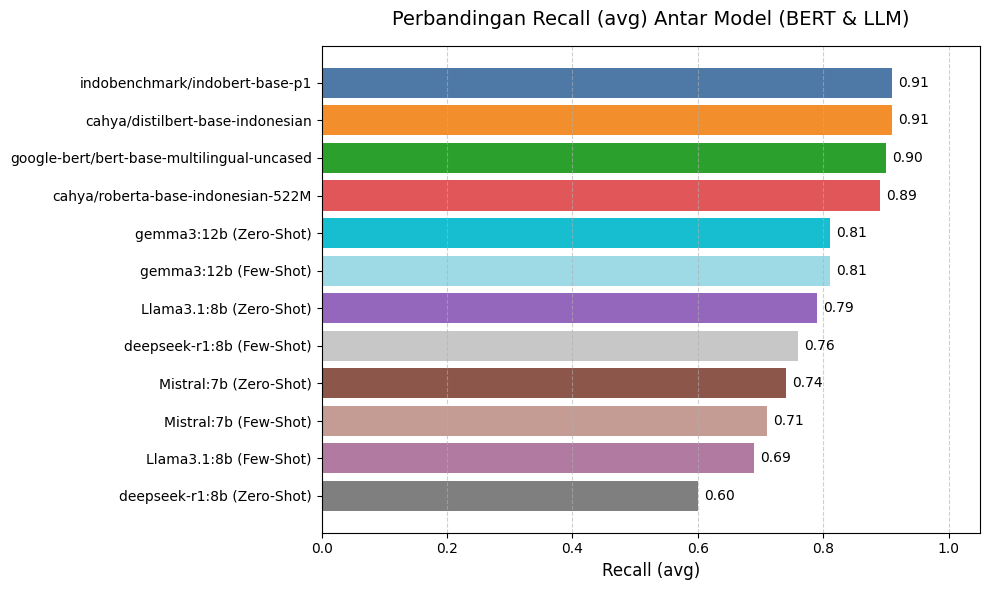

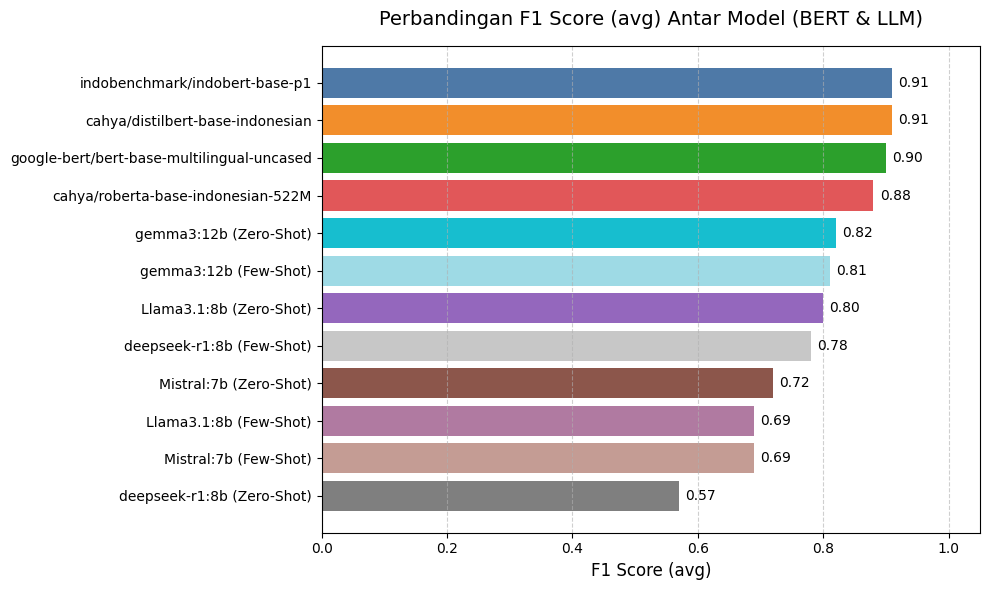

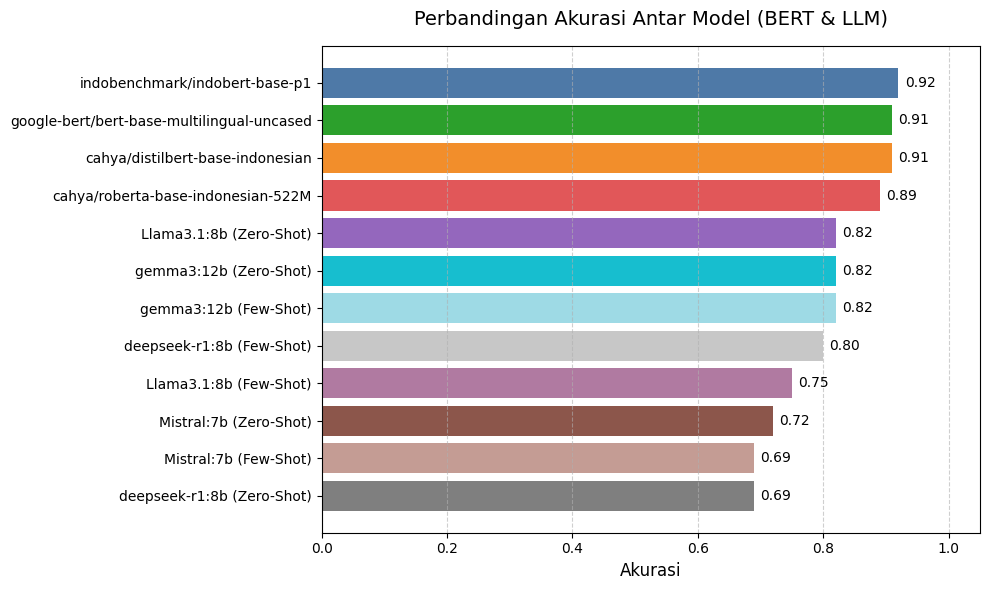

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Model': [
        'indobenchmark/indobert-base-p1',
        'cahya/roberta-base-indonesian-522M',
        'google-bert/bert-base-multilingual-uncased',
        'cahya/distilbert-base-indonesian',
        'Llama3.1:8b (Zero-Shot)',
        'Llama3.1:8b (Few-Shot)',
        'Mistral:7b (Zero-Shot)',
        'Mistral:7b (Few-Shot)',
        'gemma3:12b (Zero-Shot)',
        'gemma3:12b (Few-Shot)',
        'deepseek-r1:8b (Zero-Shot)',
        'deepseek-r1:8b (Few-Shot)',
    ],
    'Precision': [0.91, 0.88, 0.90, 0.91, 0.83, 0.83, 0.72, 0.70, 0.82, 0.82, 0.82, 0.81],
    'Recall':    [0.91, 0.89, 0.90, 0.91, 0.79, 0.69, 0.74, 0.71, 0.81, 0.81, 0.60, 0.76],
    'F1 Score':  [0.91, 0.88, 0.90, 0.91, 0.80, 0.69, 0.72, 0.69, 0.82, 0.81, 0.57, 0.78],
    'Accuracy':  [0.92, 0.89, 0.91, 0.91, 0.82, 0.75, 0.72, 0.69, 0.82, 0.82, 0.69, 0.80]
}

df = pd.DataFrame(data)

color_map = {
    'cahya/distilbert-base-indonesian': '#F28E2B', 
    'indobenchmark/indobert-base-p1': '#4E79A7',
    'cahya/roberta-base-indonesian-522M': '#E15759', 
    'google-bert/bert-base-multilingual-uncased': '#2CA02C',
    'Llama3.1:8b (Zero-Shot)': '#9467BD',
    'Llama3.1:8b (Few-Shot)': '#B07AA1',
    'Mistral:7b (Zero-Shot)': '#8C564B',
    'Mistral:7b (Few-Shot)': '#C49C94', 
    'gemma3:12b (Zero-Shot)': '#17BECF',
    'gemma3:12b (Few-Shot)': '#9EDAE5', 
    'deepseek-r1:8b (Zero-Shot)': '#7F7F7F',
    'deepseek-r1:8b (Few-Shot)': '#C7C7C7'
}

def plot_metric(metric_name, ylabel):
    df_sorted = df.sort_values(by=metric_name, ascending=False).reset_index(drop=True)
    bar_colors = [color_map[m] for m in df_sorted['Model']]

    plt.figure(figsize=(10,6))
    bars = plt.barh(df_sorted['Model'], df_sorted[metric_name], color=bar_colors)
    plt.gca().invert_yaxis()

    for bar in bars:
        plt.text(bar.get_width() + 0.01, 
                 bar.get_y() + bar.get_height()/2,
                 f"{bar.get_width():.2f}", va='center', fontsize=10)
    
    plt.xlabel(ylabel, fontsize=12)
    plt.title(f'Perbandingan {ylabel} Antar Model (BERT & LLM)', fontsize=14, pad=15)
    plt.xlim(0, 1.05)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_metric('Precision', 'Precision (avg)')
plot_metric('Recall', 'Recall (avg)')
plot_metric('F1 Score', 'F1 Score (avg)')
plot_metric('Accuracy', 'Akurasi')


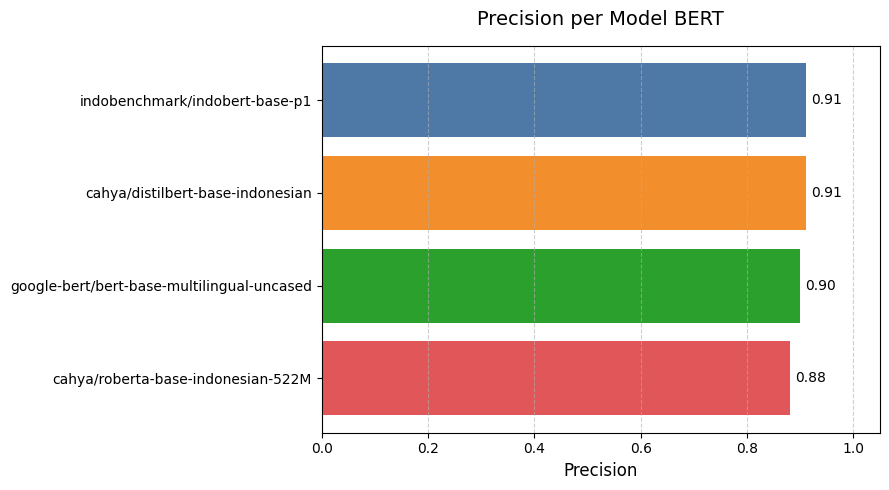

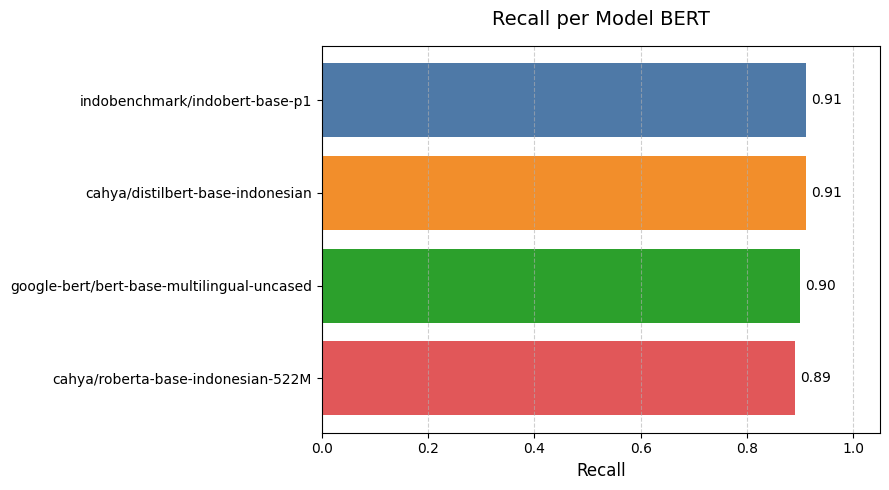

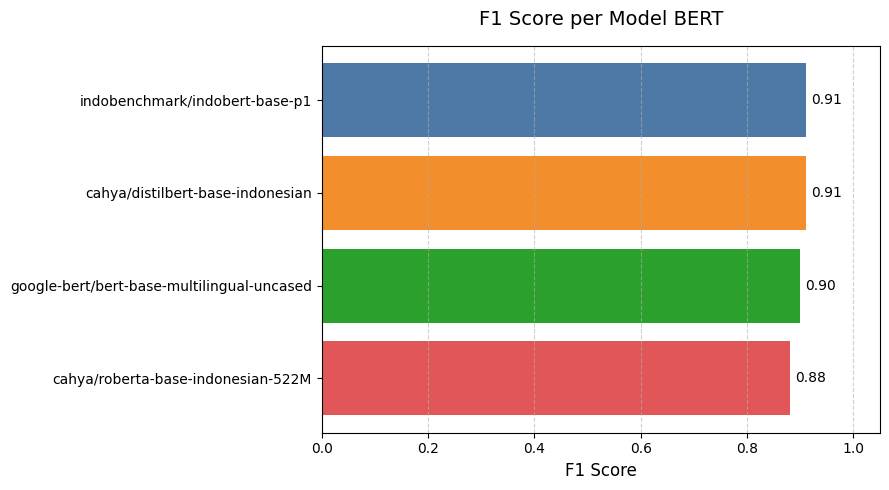

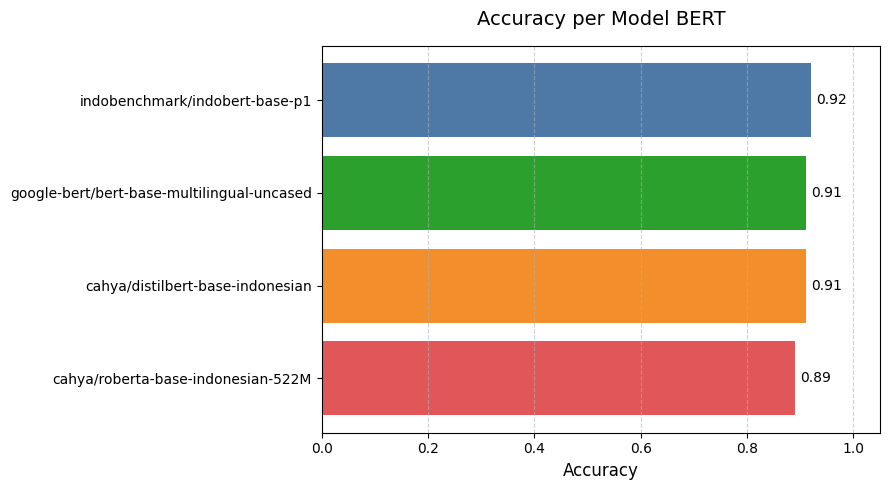

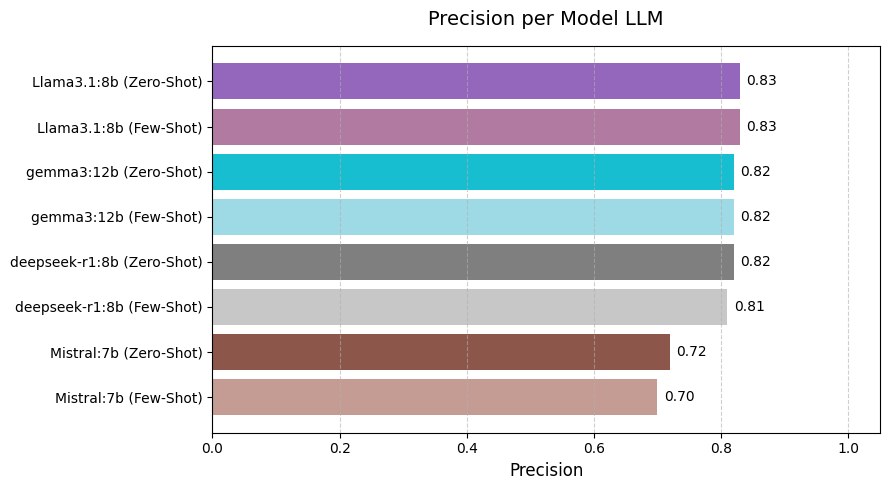

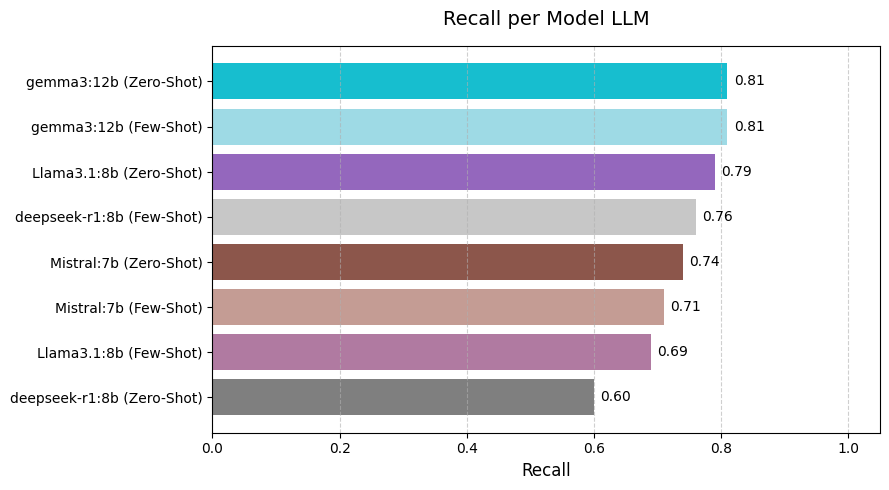

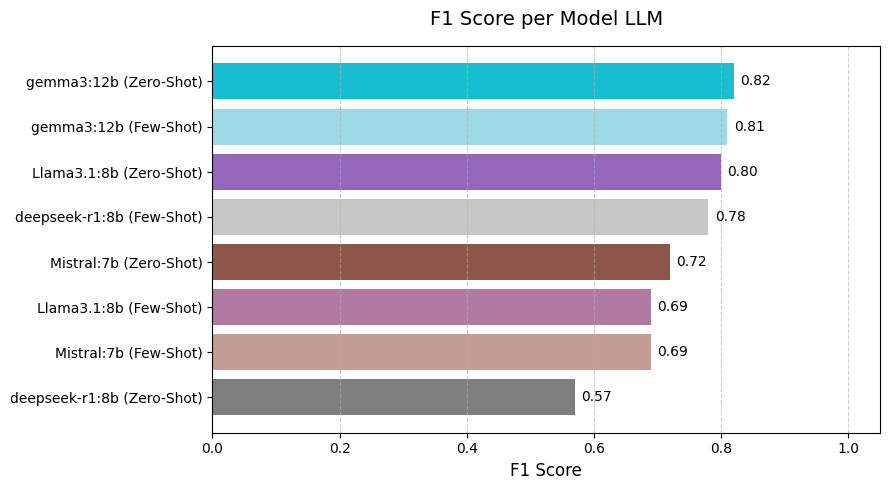

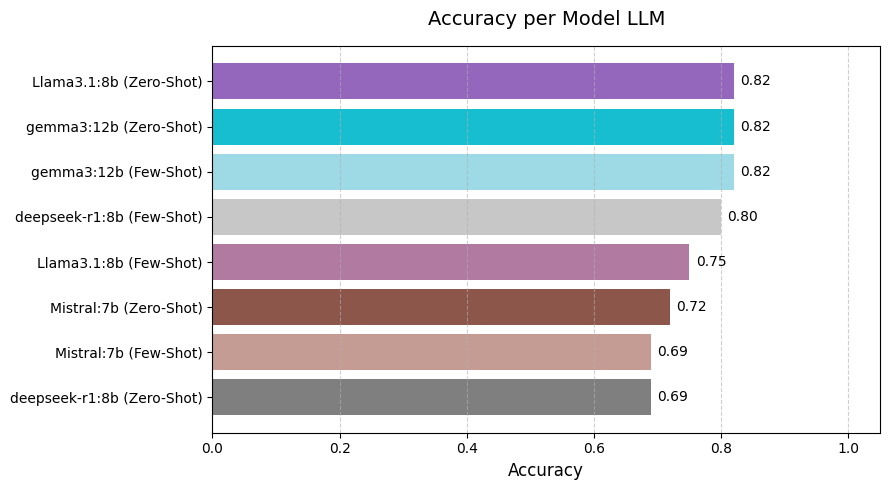

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

data_bert = {
    'Model': [
        'indobenchmark/indobert-base-p1',
        'cahya/roberta-base-indonesian-522M',
        'google-bert/bert-base-multilingual-uncased',
        'cahya/distilbert-base-indonesian'
    ],
    'Precision': [0.91, 0.88, 0.90, 0.91],
    'Recall':    [0.91, 0.89, 0.90, 0.91],
    'F1 Score':  [0.91, 0.88, 0.90, 0.91],
    'Accuracy':  [0.92, 0.89, 0.91, 0.91]
}

data_llm = {
    'Model': [
        'Llama3.1:8b (Zero-Shot)',
        'Llama3.1:8b (Few-Shot)',
        'Mistral:7b (Zero-Shot)',
        'Mistral:7b (Few-Shot)',
        'gemma3:12b (Zero-Shot)',
        'gemma3:12b (Few-Shot)',
        'deepseek-r1:8b (Zero-Shot)',
        'deepseek-r1:8b (Few-Shot)'
    ],
    'Precision': [0.83, 0.83, 0.72, 0.70, 0.82, 0.82, 0.82, 0.81],
    'Recall':    [0.79, 0.69, 0.74, 0.71, 0.81, 0.81, 0.60, 0.76],
    'F1 Score':  [0.80, 0.69, 0.72, 0.69, 0.82, 0.81, 0.57, 0.78],
    'Accuracy':  [0.82, 0.75, 0.72, 0.69, 0.82, 0.82, 0.69, 0.80]
}

df_bert = pd.DataFrame(data_bert)
df_llm = pd.DataFrame(data_llm)

color_map_bert = {
    'cahya/distilbert-base-indonesian': '#F28E2B',
    'indobenchmark/indobert-base-p1': '#4E79A7',
    'cahya/roberta-base-indonesian-522M': '#E15759',
    'google-bert/bert-base-multilingual-uncased': '#2CA02C'
}

color_map_llm = {
    'Llama3.1:8b (Zero-Shot)': '#9467BD',
    'Llama3.1:8b (Few-Shot)': '#B07AA1',  
    'Mistral:7b (Zero-Shot)': '#8C564B',  
    'Mistral:7b (Few-Shot)': '#C49C94',  
    'gemma3:12b (Zero-Shot)': '#17BECF',  
    'gemma3:12b (Few-Shot)': '#9EDAE5',  
    'deepseek-r1:8b (Zero-Shot)': '#7F7F7F',
    'deepseek-r1:8b (Few-Shot)': '#C7C7C7'
}

def plot_metric(df, metric_name, ylabel, color_map, title_suffix):
    df_sorted = df.sort_values(by=metric_name, ascending=False).reset_index(drop=True)
    bar_colors = [color_map[m] for m in df_sorted['Model']]

    plt.figure(figsize=(9,5))
    bars = plt.barh(df_sorted['Model'], df_sorted[metric_name], color=bar_colors)
    plt.gca().invert_yaxis()

    for bar in bars:
        plt.text(bar.get_width() + 0.01, 
                 bar.get_y() + bar.get_height()/2,
                 f"{bar.get_width():.2f}", va='center', fontsize=10)

    plt.xlabel(ylabel, fontsize=12)
    plt.title(f'{ylabel} per Model {title_suffix}', fontsize=14, pad=15)
    plt.xlim(0, 1.05)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

for metric in ['Precision', 'Recall', 'F1 Score', 'Accuracy']:
    plot_metric(df_bert, metric, metric, color_map_bert, 'BERT')

for metric in ['Precision', 'Recall', 'F1 Score', 'Accuracy']:
    plot_metric(df_llm, metric, metric, color_map_llm, 'LLM')


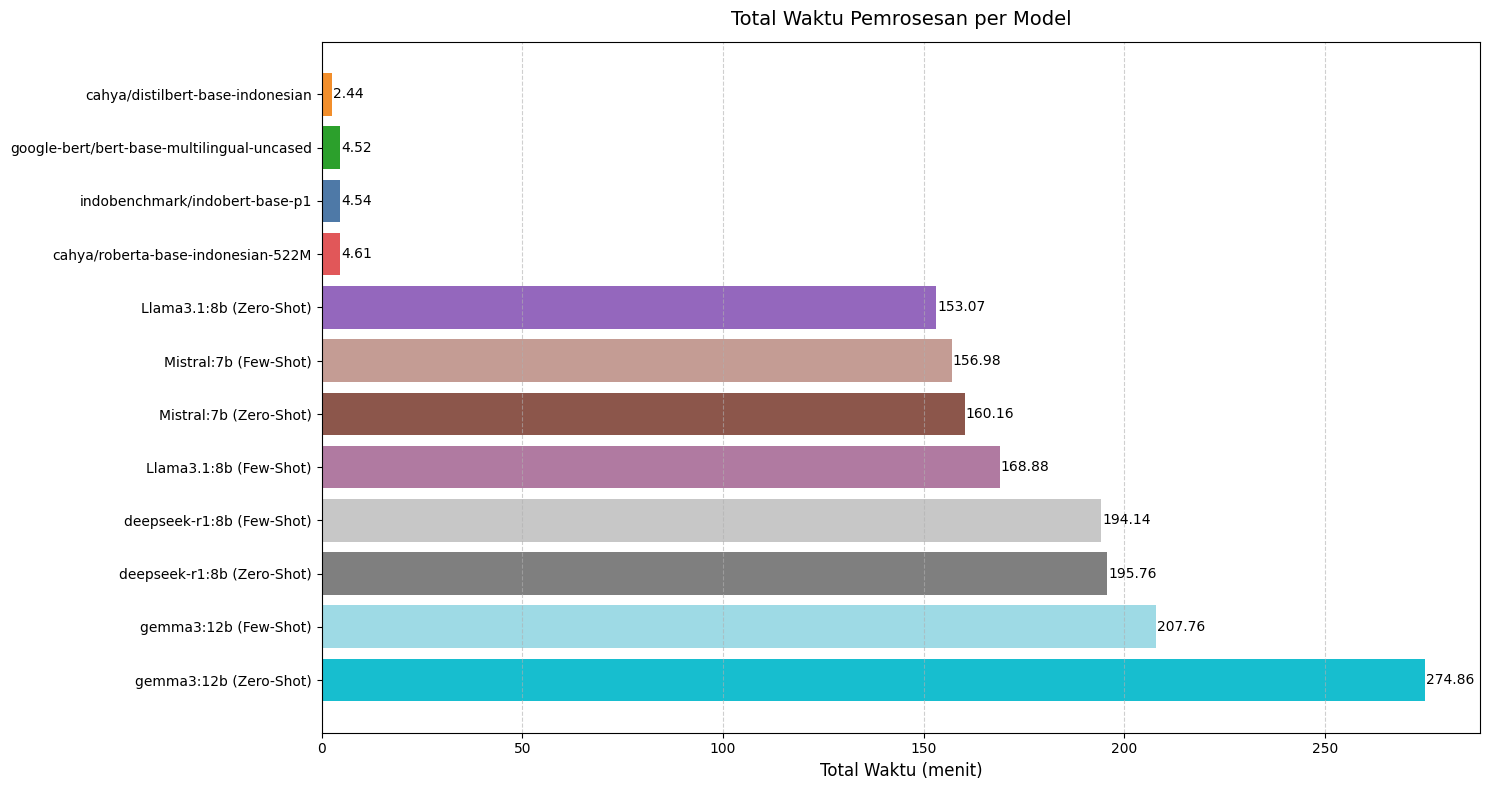

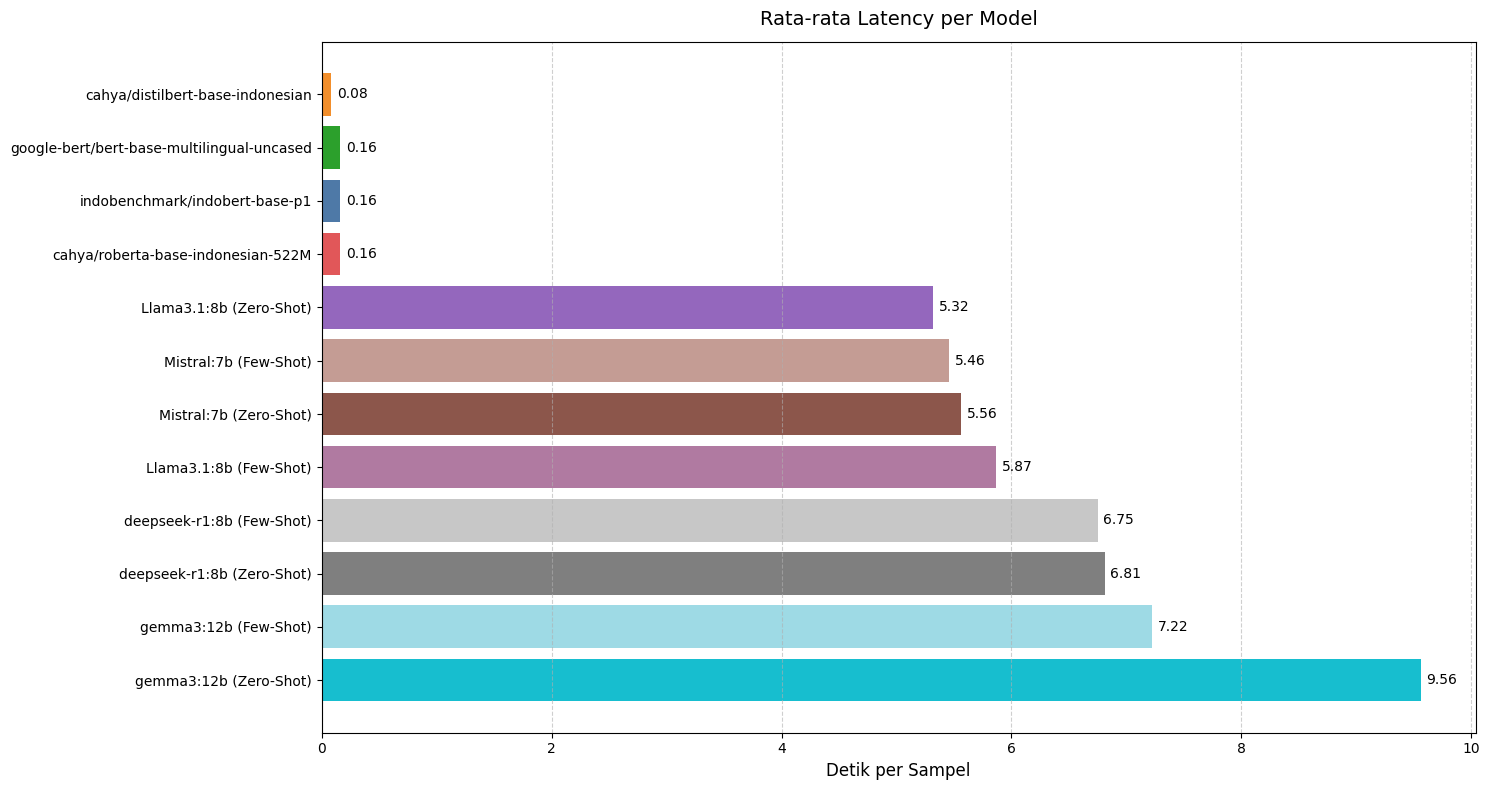

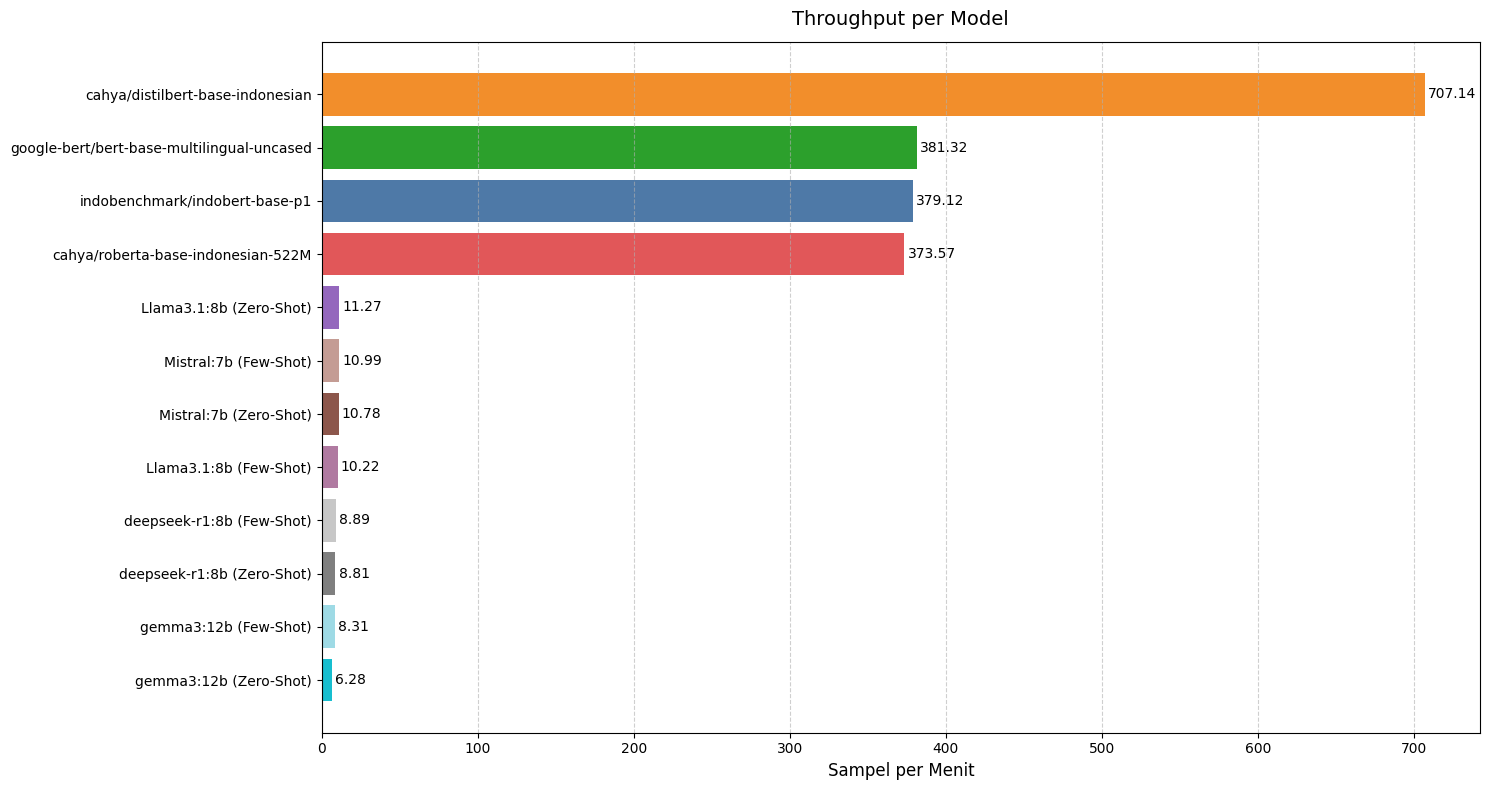

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Model": [
        "indobenchmark/indobert-base-p1",
        "cahya/roberta-base-indonesian-522M",
        "google-bert/bert-base-multilingual-uncased",
        "cahya/distilbert-base-indonesian",
        "Llama3.1:8b (Zero-Shot)",
        "Llama3.1:8b (Few-Shot)",
        "Mistral:7b (Zero-Shot)",
        "Mistral:7b (Few-Shot)",
        "gemma3:12b (Zero-Shot)",
        "gemma3:12b (Few-Shot)",
        "deepseek-r1:8b (Zero-Shot)",
        "deepseek-r1:8b (Few-Shot)"
    ],
    "Total Waktu (detik)": [
        272.68, 276.73, 271.11, 146.20,
        9184.07, 10132.90, 9609.48, 9418.59,
        16491.58, 12465.51, 11745.83, 11648.52
    ],
    "Rata-rata Latency (detik/sampel)": [
        0.16, 0.16, 0.16, 0.08,
        5.32, 5.87, 5.56, 5.46,
        9.56, 7.22, 6.81, 6.75
    ],
    "Throughput (sampel/menit)": [
        379.12, 373.57, 381.32, 707.14,
        11.27, 10.22, 10.78, 10.99,
        6.28, 8.31, 8.81, 8.89
    ]
}

color_map = {
    'cahya/distilbert-base-indonesian': '#F28E2B', 
    'indobenchmark/indobert-base-p1': '#4E79A7',
    'cahya/roberta-base-indonesian-522M': '#E15759', 
    'google-bert/bert-base-multilingual-uncased': '#2CA02C',
    'Llama3.1:8b (Zero-Shot)': '#9467BD',
    'Llama3.1:8b (Few-Shot)': '#B07AA1',
    'Mistral:7b (Zero-Shot)': '#8C564B',
    'Mistral:7b (Few-Shot)': '#C49C94', 
    'gemma3:12b (Zero-Shot)': '#17BECF',
    'gemma3:12b (Few-Shot)': '#9EDAE5', 
    'deepseek-r1:8b (Zero-Shot)': '#7F7F7F',
    'deepseek-r1:8b (Few-Shot)': '#C7C7C7'
}

df = pd.DataFrame(data)
df["Total Waktu (menit)"] = df["Total Waktu (detik)"] / 60
df = df.sort_values(by="Total Waktu (menit)", ascending=True)
df["Color"] = df["Model"].map(color_map)

# === Grafik 1: Total Waktu ===
plt.figure(figsize=(15, 8))
plt.barh(df["Model"], df["Total Waktu (menit)"], color=df["Color"])
plt.title("Total Waktu Pemrosesan per Model", fontsize=14, pad=12)
plt.xlabel("Total Waktu (menit)", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
for i, v in enumerate(df["Total Waktu (menit)"]):
    plt.text(v + 0.3, i, f"{v:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.show()

# === Grafik 2: Rata-rata Latency ===
plt.figure(figsize=(15, 8))
plt.barh(df["Model"], df["Rata-rata Latency (detik/sampel)"], color=df["Color"])
plt.title("Rata-rata Latency per Model", fontsize=14, pad=12)
plt.xlabel("Detik per Sampel", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
for i, v in enumerate(df["Rata-rata Latency (detik/sampel)"]):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.show()

# === Grafik 3: Throughput ===
plt.figure(figsize=(15, 8))
plt.barh(df["Model"], df["Throughput (sampel/menit)"], color=df["Color"])
plt.title("Throughput per Model", fontsize=14, pad=12)
plt.xlabel("Sampel per Menit", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
for i, v in enumerate(df["Throughput (sampel/menit)"]):
    plt.text(v + 2, i, f"{v:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.show()